In [33]:
import pandas as pd
import numpy as np

In [54]:
# Загрузка данных
data = pd.read_csv('Admission_Predict.csv', sep=',')

Данный набор данных состоит из данных 400 студентов и оценок, полученных ими в различных тестах, таких как GRE, TOEFL, а также их CGPA в колледже, а также о том, проводилась ли ими какая-либо исследовательская работа во время окончания учебы. Целевой меткой являются их шансы на поступление в магистратуру с учетом рейтинга университета.

In [6]:
# Просмотр первых 20 строк
data.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
5,6,330,115,5,4.5,3.0,9.34,1,1
6,7,321,109,3,3.0,4.0,8.20,1,1
7,8,308,101,2,3.0,4.0,7.90,0,0
8,9,302,102,1,2.0,1.5,8.00,0,0
9,10,323,108,3,3.5,3.0,8.60,0,0


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.450000
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.498117
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.000000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


In [8]:
data.isna().sum(axis=1).sum()

0

Предобработка данных

In [55]:
# Предобработка данных
# Удаление ненужных признаков, обработка пропущенных значений
data.drop('Serial No.', axis=1, inplace=True)  # Убираем столбец с номером
data.dropna(inplace=True)  # удаляем строки с пропущенными значениями

In [56]:
from sklearn.preprocessing import StandardScaler
# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [57]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


**Дерево решений:**

Разбиение на обучающую и тестовую выборку

In [58]:
# Разбиваем на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

In [59]:
X = data.drop('Chance of Admit', axis=1)
y = data['Chance of Admit']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Дерево решений

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [76]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': range(2, 8)
}

# Подбор гиперпараметров с помощью GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': range(2, 8)})

In [77]:
# Лучшие значения гиперпараметров и метрики
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Best hyperparameters: {'max_depth': 3, 'max_features': 2}
Accuracy: 0.85
Precision: 0.7837837837837838
Recall: 0.8787878787878788
F1 Score: 0.8285714285714285


In [78]:
best_dt = grid_search.best_estimator_
feature_importances = best_dt.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")

Feature Importances:
TOEFL Score: 0.7137651349402058
GRE Score: 0.126187367070242
LOR: 0.08096650112283123
University Rating: 0.07908099686672113
Research: 0.0
CGPA: 0.0
SOP: 0.0


Фильтрация признаков по значению порога важности признака

In [79]:
# Фильтрация признаков
threshold = 0.1  # Задаем пороговое значение для важности признака
selected_features = X.columns[feature_importances >= threshold]

In [80]:
selected_features

Index(['GRE Score', 'TOEFL Score'], dtype='object')

In [81]:
# Подбор лучшей модели на обучающей выборке с отфильтрованными признаками
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

grid_search.fit(X_train_filtered, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': range(2, 8)})

In [82]:
# Полученные гиперпараметры лучшей модели
print("Best hyperparameters after feature selection:", grid_search.best_params_)
y_pred_filtered = grid_search.predict(X_test_filtered)
print("Accuracy after feature selection:", accuracy_score(y_test, y_pred_filtered))
print("Precision after feature selection:", precision_score(y_test, y_pred_filtered))
print("Recall after feature selection:", recall_score(y_test, y_pred_filtered))
print("F1 Score after feature selection:", f1_score(y_test, y_pred_filtered))

Best hyperparameters after feature selection: {'max_depth': 3, 'max_features': 2}
Accuracy after feature selection: 0.8875
Precision after feature selection: 0.8529411764705882
Recall after feature selection: 0.8787878787878788
F1 Score after feature selection: 0.8656716417910447


Сравнение метрик до и после фильтрации признаков

In [83]:
# Сравнение метрик до и после фильтрации признаков

# Метрики до фильтрации
print("Метрики до фильтрации:")
print("Accuracy до:", accuracy_score(y_test, y_pred))
print("Precision до:", precision_score(y_test, y_pred))
print("Recall до:", recall_score(y_test, y_pred))
print("F1 Score до:", f1_score(y_test, y_pred))

# Метрики после фильтрации
print("\nМетрики после фильтрации:")
print("Accuracy после:", accuracy_score(y_test, y_pred_filtered))
print("Precision после:", precision_score(y_test, y_pred_filtered))
print("Recall после:", recall_score(y_test, y_pred_filtered))
print("F1 Score после:", f1_score(y_test, y_pred_filtered))

Метрики до фильтрации:
Accuracy до: 0.85
Precision до: 0.7837837837837838
Recall до: 0.8787878787878788
F1 Score до: 0.8285714285714285

Метрики после фильтрации:
Accuracy после: 0.8875
Precision после: 0.8529411764705882
Recall после: 0.8787878787878788
F1 Score после: 0.8656716417910447


После фильтрации метрики немного улучшились

**Случайный лес**

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.feature_selection import SelectFromModel

In [86]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': range(10, 150, 5),
    'max_depth': range(1, 8),
}

In [87]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 8),
                         'n_estimators': range(10, 150, 5)})

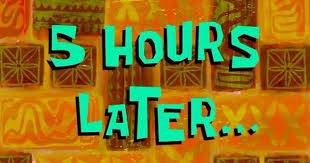

Вывод параметров лучшей модели случайного леса

In [88]:
# Вывод гиперпараметров лучшей модели случайного леса
print("Лучшие гиперпараметры случайного леса:")
print(grid_search.best_params_)

Лучшие гиперпараметры случайного леса:
{'max_depth': 2, 'n_estimators': 10}


In [91]:
# Фильтрация признаков
sfm = SelectFromModel(grid_search.best_estimator_)
X_train_filtered = sfm.fit_transform(X_train, y_train)
X_test_filtered = sfm.transform(X_test)

Подбор лучшей модели случайного леса на отфильтрованных признаках

In [92]:
# Подбор лучшей модели с использованием GridSearchCV на отфильтрованных признаках
grid_search_filtered = GridSearchCV(rf, param_grid, cv=5)
grid_search_filtered.fit(X_train_filtered, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 8),
                         'n_estimators': range(10, 150, 5)})

In [93]:
# Вывод гиперпараметров лучшей модели случайного леса после фильтрации
print("\nЛучшие гиперпараметры случайного леса после фильтрации:")
print(grid_search_filtered.best_params_)


Лучшие гиперпараметры случайного леса после фильтрации:
{'max_depth': 4, 'n_estimators': 70}


Сравнение метрик до и после фильтрации признаков лучших моделей

In [94]:
# Сравнение метрик до и после фильтрации признаков
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_filtered = grid_search_filtered.best_estimator_.predict(X_test_filtered)

# Метрики до и после фильтрации
print("\nМетрики до фильтрации:")
print("Accuracy до:", accuracy_score(y_test, y_pred))
print("F1 Score до:", f1_score(y_test, y_pred))

print("\nМетрики после фильтрации:")
print("Accuracy после:", accuracy_score(y_test, y_pred_filtered))
print("F1 Score после:", f1_score(y_test, y_pred_filtered))


Метрики до фильтрации:
Accuracy до: 0.9375
F1 Score до: 0.923076923076923

Метрики после фильтрации:
Accuracy после: 0.8625
F1 Score после: 0.8405797101449276


Метрики после фильтрации заметно ухудшились

**Метод ближайших соседей:**

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn_model = KNeighborsClassifier()

knn_grid = {'n_neighbors': range(2, 50)}

knn_search = GridSearchCV(knn_model, knn_grid, cv = 10, n_jobs=-1, verbose=2)
knn_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=2)

Вывести значения гиперпараметра и метрик для наилучшей модели.

In [108]:
knn_search.best_params_

{'n_neighbors': 48}

Осущестрим фильтрацию признаков

In [110]:
knn_filtered = selected_features
x_train_knn_filtered = X_train[knn_filtered]
x_train_knn_filtered.head()

,GRE Score,TOEFL Score
3,322,110
18,318,110
202,340,120
250,320,104
274,315,100


Подберем лучшую модель с использованием GridSearchCV

In [112]:
knn_search_filtered = GridSearchCV(knn_model, knn_grid, cv = 10, n_jobs= -1, verbose= 2)
knn_search_filtered.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(2, 50)}, verbose=2)

In [114]:
#Выведем полученные гиперпараметры
knn_search_filtered.best_params_

{'n_neighbors': 48}

In [115]:
knn_best_model = knn_search.best_estimator_
knn_best_model_f = knn_search_filtered.best_estimator_

In [117]:
print('Before filtering')
print(f'Accuracy:\t{accuracy_score(y_train, knn_best_model.predict(X_train))}')
print(f'Precision:\t{precision_score(y_train, knn_best_model.predict(X_train))}')
print(f'Recall:\t{recall_score(y_train, knn_best_model.predict(X_train))}')
print(f'F-measure:\t{f1_score(y_train, knn_best_model.predict(X_train))}')
print('After filtering')
print(f'Accuracy:\t{accuracy_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'Precision:\t{precision_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'Recall:\t{recall_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')
print(f'F-measure:\t{f1_score(y_train, knn_best_model_f.predict(x_train_knn_filtered))}')

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Before filtering
Accuracy: 0.85
Precision: 0.8613138686131386
Recall: 0.8027210884353742
F-measure: 0.8309859154929576
After filtering
Accuracy: 0.846875
Precision: 0.855072463768116
Recall: 0.8027210884353742
F-measure: 0.8280701754385965


Значения метрик немного ухудшились

**Задание 6.** Мы наблюдали улучшение модели на отфильтрованных признаках для модели DecisionTreeClassifier.

In [118]:
selected_features

Index(['GRE Score', 'TOEFL Score'], dtype='object')

Для DecisionTreeClassifier

In [121]:
# Подбор лучшей модели на обучающей выборке с отфильтрованными признаками
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

In [122]:
# Подбор лучшей модели KNeighborsClassifier на отфильтрованных признаках
knn_model = KNeighborsClassifier()

knn_grid = {'n_neighbors': range(2, 50)}

knn_search = GridSearchCV(knn_model, knn_grid, cv=10, n_jobs=-1, verbose=2)
knn_search.fit(X_train_filtered, y_train)

# Вывод наилучших гиперпараметров и метрик для KNeighborsClassifier
print("Best hyperparameters for KNeighborsClassifier after feature selection:", knn_search.best_params_)
y_pred_knn_filtered = knn_search.predict(X_test_filtered)
print("Accuracy for KNeighborsClassifier after feature selection:", accuracy_score(y_test, y_pred_knn_filtered))
print("Precision for KNeighborsClassifier after feature selection:", precision_score(y_test, y_pred_knn_filtered))
print("Recall for KNeighborsClassifier after feature selection:", recall_score(y_test, y_pred_knn_filtered))
print("F1 Score for KNeighborsClassifier after feature selection:", f1_score(y_test, y_pred_knn_filtered))

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best hyperparameters for KNeighborsClassifier after feature selection: {'n_neighbors': 15}
Accuracy for KNeighborsClassifier after feature selection: 0.875
Precision for KNeighborsClassifier after feature selection: 0.8285714285714286
Recall for KNeighborsClassifier after feature selection: 0.8787878787878788
F1 Score for KNeighborsClassifier after feature selection: 0.8529411764705883


In [123]:
# Подбор лучшей модели DecisionTreeClassifier на отфильтрованных признаках
dt_model = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': range(2, 8)
}

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_search_dt.fit(X_train_filtered, y_train)

# Вывод наилучших гиперпараметров и метрик для DecisionTreeClassifier
print("Best hyperparameters for DecisionTreeClassifier after feature selection:", grid_search_dt.best_params_)
y_pred_dt_filtered = grid_search_dt.predict(X_test_filtered)
print("Accuracy for DecisionTreeClassifier after feature selection:", accuracy_score(y_test, y_pred_dt_filtered))
print("Precision for DecisionTreeClassifier after feature selection:", precision_score(y_test, y_pred_dt_filtered))
print("Recall for DecisionTreeClassifier after feature selection:", recall_score(y_test, y_pred_dt_filtered))
print("F1 Score for DecisionTreeClassifier after feature selection:", f1_score(y_test, y_pred_dt_filtered))


Best hyperparameters for DecisionTreeClassifier after feature selection: {'max_depth': 3, 'max_features': 2}
Accuracy for DecisionTreeClassifier after feature selection: 0.8875
Precision for DecisionTreeClassifier after feature selection: 0.8529411764705882
Recall for DecisionTreeClassifier after feature selection: 0.8787878787878788
F1 Score for DecisionTreeClassifier after feature selection: 0.8656716417910447


In [124]:
# Подбор лучшей модели RandomForestClassifier на отфильтрованных признаках
rf_model = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': range(10, 150, 5),
    'max_depth': range(1, 8),
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_filtered, y_train)

# Вывод наилучших гиперпараметров и метрик для RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier after feature selection:", grid_search_rf.best_params_)
y_pred_rf_filtered = grid_search_rf.predict(X_test_filtered)
print("Accuracy for RandomForestClassifier after feature selection:", accuracy_score(y_test, y_pred_rf_filtered))
print("Precision for RandomForestClassifier after feature selection:", precision_score(y_test, y_pred_rf_filtered))
print("Recall for RandomForestClassifier after feature selection:", recall_score(y_test, y_pred_rf_filtered))
print("F1 Score for RandomForestClassifier after feature selection:", f1_score(y_test, y_pred_rf_filtered))

Best hyperparameters for RandomForestClassifier after feature selection: {'max_depth': 1, 'n_estimators': 135}
Accuracy for RandomForestClassifier after feature selection: 0.875
Precision for RandomForestClassifier after feature selection: 0.8285714285714286
Recall for RandomForestClassifier after feature selection: 0.8787878787878788
F1 Score for RandomForestClassifier after feature selection: 0.8529411764705883


**Задание 7. Визуализация**

In [138]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn import tree

Визуализация решающего дерева DecisionTreeClassifier

In [127]:
best_dt_model = grid_search_dt.best_estimator_
feature_names = data.columns[:-1]  # Признаки, последний столбец - целевая переменная
class_names = ['0', '1']

In [140]:
dot_data = export_graphviz(best_dt_model, out_file=None, feature_names=selected_features,
                           class_names=class_names, filled=True, rounded=True)


In [141]:
# Визуализация дерева
graph = graphviz.Source(dot_data)
graph.render("decision_tree_visualization")
graph.view()

'decision_tree_visualization.pdf'

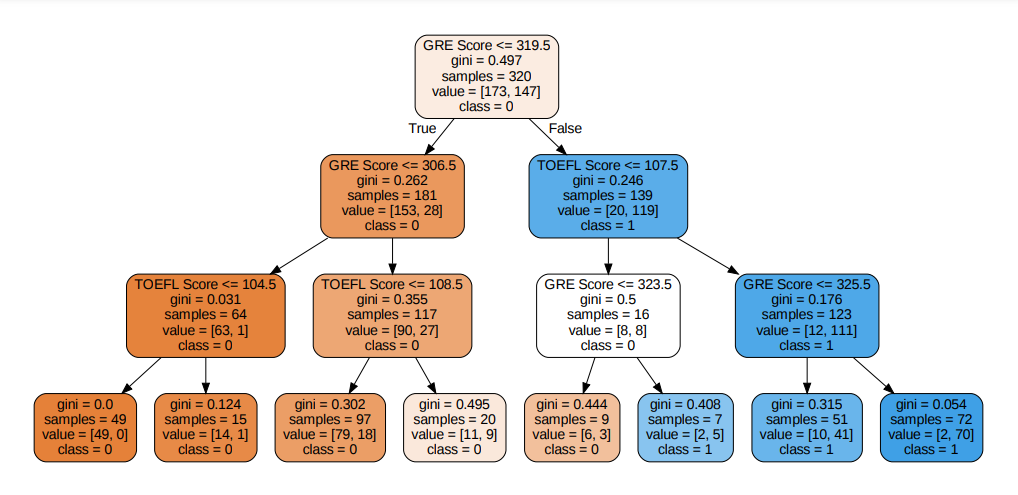

Сравним лучшие модели

In [146]:
# Вывод наилучших гиперпараметров и метрик для KNeighborsClassifier
print("Best hyperparameters for KNeighborsClassifier after feature selection:", knn_search.best_params_)
y_pred_knn_filtered = knn_search.predict(X_test_filtered)
print("Accuracy for KNeighborsClassifier after feature selection:", accuracy_score(y_test, y_pred_knn_filtered))
print("Precision for KNeighborsClassifier after feature selection:", precision_score(y_test, y_pred_knn_filtered))
print("Recall for KNeighborsClassifier after feature selection:", recall_score(y_test, y_pred_knn_filtered))
print("F1 Score for KNeighborsClassifier after feature selection:", f1_score(y_test, y_pred_knn_filtered))

Best hyperparameters for KNeighborsClassifier after feature selection: {'n_neighbors': 15}
Accuracy for KNeighborsClassifier after feature selection: 0.875
Precision for KNeighborsClassifier after feature selection: 0.8285714285714286
Recall for KNeighborsClassifier after feature selection: 0.8787878787878788
F1 Score for KNeighborsClassifier after feature selection: 0.8529411764705883


In [147]:
# Вывод наилучших гиперпараметров и метрик для DecisionTreeClassifier
print("Best hyperparameters for DecisionTreeClassifier after feature selection:", grid_search_dt.best_params_)
y_pred_dt_filtered = grid_search_dt.predict(X_test_filtered)
print("Accuracy for DecisionTreeClassifier after feature selection:", accuracy_score(y_test, y_pred_dt_filtered))
print("Precision for DecisionTreeClassifier after feature selection:", precision_score(y_test, y_pred_dt_filtered))
print("Recall for DecisionTreeClassifier after feature selection:", recall_score(y_test, y_pred_dt_filtered))
print("F1 Score for DecisionTreeClassifier after feature selection:", f1_score(y_test, y_pred_dt_filtered))


Best hyperparameters for DecisionTreeClassifier after feature selection: {'max_depth': 3, 'max_features': 2}
Accuracy for DecisionTreeClassifier after feature selection: 0.8875
Precision for DecisionTreeClassifier after feature selection: 0.8529411764705882
Recall for DecisionTreeClassifier after feature selection: 0.8787878787878788
F1 Score for DecisionTreeClassifier after feature selection: 0.8656716417910447


In [148]:
# Вывод наилучших гиперпараметров и метрик для RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier after feature selection:", grid_search_rf.best_params_)
y_pred_rf_filtered = grid_search_rf.predict(X_test_filtered)
print("Accuracy for RandomForestClassifier after feature selection:", accuracy_score(y_test, y_pred_rf_filtered))
print("Precision for RandomForestClassifier after feature selection:", precision_score(y_test, y_pred_rf_filtered))
print("Recall for RandomForestClassifier after feature selection:", recall_score(y_test, y_pred_rf_filtered))
print("F1 Score for RandomForestClassifier after feature selection:", f1_score(y_test, y_pred_rf_filtered))

Best hyperparameters for RandomForestClassifier after feature selection: {'max_depth': 1, 'n_estimators': 135}
Accuracy for RandomForestClassifier after feature selection: 0.875
Precision for RandomForestClassifier after feature selection: 0.8285714285714286
Recall for RandomForestClassifier after feature selection: 0.8787878787878788
F1 Score for RandomForestClassifier after feature selection: 0.8529411764705883


Исходя из полученных метрик лучших моделей можно сказать, что DecisionTreeClassifier имеет немного более высокую точность и F1-меру по сравнению с KNeighborsClassifier и RandomForestClassifier.

Дольше всего обучался случайный лес (Я ждал часа полтора несколько раз, потом решил взять датасет по меньше).